In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)  # None means unlimited
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Show full content of each column

In [1045]:
# read data from file
wb_raw = pd.read_excel("C:\\Users\\husee\\Desktop\\thesis_2023\\Structured\\Data\\WorldBank Indicators\\Selected_Indicators.xlsx")
wb = wb_raw.drop(['Series Name'], axis=1)

series_name_and_code = wb_raw[['Series Name', 'Series Code']].drop_duplicates().dropna()

# printing data
wb.head()

,Country Name,Country Code,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,134.25036,162.642175,166.224831,141.365322,149.744068,181.598776,194.669036,205.674097,232.778699,255.045622,284.755532,291.649791,311.853617,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,182.174037,199.643228,221.830531,254.115274,274.015394,376.318296,382.533804,453.387382,562.499219,608.738856,653.417479,638.733185,626.51293,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,..
1,Afghanistan,AFG,NY.GDP.PCAP.KD.ZG,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,0.927029,-2.497255,7.321874,1.084988,11.803383,1.864754,17.143534,11.09922,-3.211364,8.247144,2.002522,-0.964803,-1.666416,-0.345802,-0.253594,-1.688577,0.932833,-5.364666,-22.966942,..
2,Afghanistan,AFG,NV.AGR.TOTL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,38.627892,37.418855,29.721067,31.114855,28.635969,30.105011,24.89227,29.297501,26.210069,23.743664,24.390874,22.810663,22.137041,20.634323,25.740314,26.420199,22.042897,25.773971,29.975583,33.597619,..
3,Afghanistan,AFG,NV.IND.TOTL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,23.810127,22.710864,26.22679,26.812099,28.210768,26.882242,26.915628,21.897122,21.151421,22.740252,21.157807,20.444605,21.229663,22.124042,10.466808,10.051874,13.387247,14.058112,12.9526,14.273657,..
4,Afghanistan,AFG,NV.SRV.TOTL.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,36.151155,37.444804,41.110895,39.007787,39.831024,40.294685,45.409831,45.244435,48.879377,49.69682,50.579398,52.682743,52.990865,53.235293,59.023216,58.32905,59.477423,55.472807,52.572109,47.160422,..


In [1074]:
indicators_used = [
    # "EN.ATM.PM25.MC.ZS", #	2614	PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)
    # "EN.ATM.PM25.MC.M3", #	3059	PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
    "EN.CO2.BLDG.ZS", #	4335	CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)
    "EN.CO2.TRAN.ZS", #	4335	CO2 emissions from transport (% of total fuel combustion)
    "EN.CO2.OTHX.ZS", #	4335	CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)
    "EN.CO2.MANF.ZS", #	4335	CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
    "EN.CO2.ETOT.ZS", #	4335	CO2 emissions from electricity and heat production, total (% of total fuel combustion)
    "EG.IMP.CONS.ZS", #	4389	Energy imports, net (% of energy use)
    "EG.USE.COMM.FO.ZS", #	4416	Fossil fuel energy consumption (% of total)
    "EN.ATM.CO2E.EG.ZS", #	4503	CO2 intensity (kg per kg of oil equivalent energy use)
    # "NY.ADJ.DPEM.CD", #	5342	Adjusted savings: particulate emission damage (current US$)
    "EN.ATM.CO2E.SF.KT", #	5365	CO2 emissions from solid fuel consumption (kt)
    "EN.ATM.CO2E.GF.KT", #	5491	CO2 emissions from gaseous fuel consumption (kt)
    "EN.ATM.CO2E.LF.KT", #	5685	CO2 emissions from liquid fuel consumption (kt)
    "EN.ATM.CO2E.SF.ZS", #	5698	CO2 emissions from solid fuel consumption (% of total)
    "EN.ATM.CO2E.LF.ZS", #	5698	CO2 emissions from liquid fuel consumption (% of total)
    "EN.ATM.CO2E.GF.ZS", #	5698	CO2 emissions from gaseous fuel consumption (% of total)
    "EN.URB.LCTY.UR.ZS", #	5866	Population in the largest city (% of urban population)
    "NV.SRV.TOTL.ZS", #	6349	Services, value added (% of GDP)
    "NV.IND.TOTL.ZS", #	6447	Industry (including construction), value added (% of GDP)
    "NV.AGR.TOTL.ZS", #	6561	Agriculture, forestry, and fishing, value added (% of GDP)
    "EN.ATM.CO2E.PC", #	6630	CO2 emissions (metric tons per capita)
    "EN.ATM.CO2E.KT", #	6630	CO2 emissions (kt)
    "EN.ATM.GHGT.KT.CE", #	6630	Total greenhouse gas emissions (kt of CO2 equivalent)
    "EG.FEC.RNEW.ZS", #	6683	Renewable energy consumption (% of total final energy consumption)
    "NY.GDP.PCAP.KD.ZG", #	6779	GDP per capita growth (annual %)
    "EN.POP.DNST", #	6819	Population density (people per sq. km of land area)
    "NY.GDP.PCAP.CD", #	6864	GDP per capita (current US$)
    "SP.POP.GROW", #	6865	Population growth (annual %)
    "NY.ADJ.DPEM.GN.ZS", #	6866	Adjusted savings: particulate emission damage (% of GNI)
    "SP.POP.TOTL" #	6866	Population, total
]

wb = wb[wb["Series Code"].isin(indicators_used)]
wb.shape

(7448, 66)

In [1075]:
wb_melted = wb.melt(id_vars=['Country Name', 'Country Code', 'Series Code'], var_name='Year', value_name='Value')
wb_melted.head()

,Country Name,Country Code,Series Code,Year,Value
0,Afghanistan,AFG,NY.GDP.PCAP.CD,1960 [YR1960],62.369375
1,Afghanistan,AFG,NY.GDP.PCAP.KD.ZG,1960 [YR1960],..
2,Afghanistan,AFG,NV.AGR.TOTL.ZS,1960 [YR1960],..
3,Afghanistan,AFG,NV.IND.TOTL.ZS,1960 [YR1960],..
4,Afghanistan,AFG,NV.SRV.TOTL.ZS,1960 [YR1960],..


In [1076]:
wb_melted['Value'] = pd.to_numeric(wb_melted['Value'], errors='coerce')
wb_melted['Year'] = pd.to_numeric(wb_melted['Year'].str.replace(r'\[.*\]', '', regex=True))
# Drop records earlier than year 1990
wb_melted = wb_melted[wb_melted['Year'] >= 1990]
# Shape of final df
wb_melted.shape

(245784, 5)

In [1077]:
wb_pivot = wb_melted.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Series Code', values='Value', aggfunc='max')
# Reset index
wb_pivot = wb_pivot.reset_index(drop=False)
# Drop records where the dependent value is missing
wb_pivot = wb_pivot.dropna(subset=['NY.ADJ.DPEM.GN.ZS'])

wb_pivot.head()

Series Code,Country Name,Country Code,Year,EG.FEC.RNEW.ZS,EG.IMP.CONS.ZS,EG.USE.COMM.FO.ZS,EN.ATM.CO2E.EG.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGT.KT.CE,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,EN.URB.LCTY.UR.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.ADJ.DPEM.GN.ZS,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD.ZG,SP.POP.GROW,SP.POP.TOTL
19,Afghanistan,AFG,2009,16.53,NaN,NaN,NaN,271.358,4.522633,6558.97,4946.783,82.446383,0.239507,1536.473,25.607883,24313.53007,NaN,NaN,NaN,NaN,NaN,41.987193,49.794753,29.297501,21.897122,45.244435,3.207473,453.387382,17.143534,3.561288,27385307.0
20,Afghanistan,AFG,2010,15.15,NaN,NaN,NaN,271.358,3.129850,8576.15,5870.867,67.714729,0.304230,2299.209,26.519135,28585.90265,NaN,NaN,NaN,NaN,NaN,43.220447,49.152851,26.210069,21.151421,48.879377,2.973525,562.499219,11.099220,2.894904,28189672.0
21,Afghanistan,AFG,2011,12.61,NaN,NaN,NaN,308.028,2.512463,11961.89,7609.025,62.063825,0.408965,4305.058,35.114666,32446.46096,NaN,NaN,NaN,NaN,NaN,44.844851,48.134922,23.743664,22.740252,49.696820,3.103732,608.738856,-3.211364,3.689508,29249157.0
22,Afghanistan,AFG,2012,15.36,NaN,NaN,NaN,308.028,2.947636,10208.13,6761.948,64.707636,0.335061,3667.000,35.090909,30928.57237,NaN,NaN,NaN,NaN,NaN,46.711251,46.958788,24.390874,21.157807,50.579398,2.831011,653.417479,8.247144,4.077628,30466479.0
23,Afghanistan,AFG,2013,16.86,NaN,NaN,NaN,297.027,3.490329,9402.05,4785.435,56.233079,0.298088,3942.025,46.322268,30430.30008,NaN,NaN,NaN,NaN,NaN,48.359028,46.090589,22.810663,20.444605,52.682743,2.793627,638.733185,2.002522,3.466788,31541209.0


In [1078]:
wb_pivot.shape

(6866, 31)

In [1079]:
wb_pivot.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6866 entries, 19 to 8742
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       6866 non-null   object 
 1   Country Code       6866 non-null   object 
 2   Year               6866 non-null   int64  
 3   EG.FEC.RNEW.ZS     6683 non-null   float64
 4   EG.IMP.CONS.ZS     4389 non-null   float64
 5   EG.USE.COMM.FO.ZS  4416 non-null   float64
 6   EN.ATM.CO2E.EG.ZS  4503 non-null   float64
 7   EN.ATM.CO2E.GF.KT  5491 non-null   float64
 8   EN.ATM.CO2E.GF.ZS  5698 non-null   float64
 9   EN.ATM.CO2E.KT     6630 non-null   float64
 10  EN.ATM.CO2E.LF.KT  5685 non-null   float64
 11  EN.ATM.CO2E.LF.ZS  5698 non-null   float64
 12  EN.ATM.CO2E.PC     6630 non-null   float64
 13  EN.ATM.CO2E.SF.KT  5365 non-null   float64
 14  EN.ATM.CO2E.SF.ZS  5698 non-null   float64
 15  EN.ATM.GHGT.KT.CE  6630 non-null   float64
 16  EN.CO2.BLDG.ZS     4335 non-

In [1080]:
def count_non_null(x):
    return np.sum(~pd.isnull(x))

# Use the custom function in pivot_table()
summary = wb_pivot.pivot_table(index='Year', aggfunc=count_non_null)

# summary = wb_pivot_NA_input.pivot_table(index='Year', aggfunc='count', fill_value=0)
summary.reset_index(drop=False, inplace=True)

summary_column_totals = summary.sum()

# Sort column totals to get the order
summary_sorted_columns = summary_column_totals.sort_values(ascending=False).index

# Reorder columns based on the sorted order of column totals
summary = summary[summary_sorted_columns]

summary.head()

Series Code,Year,Country Code,NY.ADJ.DPEM.GN.ZS,SP.POP.TOTL,Country Name,SP.POP.GROW,NY.GDP.PCAP.CD,EN.POP.DNST,NY.GDP.PCAP.KD.ZG,EG.FEC.RNEW.ZS,EN.ATM.GHGT.KT.CE,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,EN.URB.LCTY.UR.ZS,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.SF.ZS,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.EG.ZS,EG.USE.COMM.FO.ZS,EG.IMP.CONS.ZS,EN.CO2.TRAN.ZS,EN.CO2.OTHX.ZS,EN.CO2.MANF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS
0,1990,187,187,187,187,187,186,180,174,185,185,185,185,150,143,134,160,170,170,170,178,168,164,166,164,148,148,148,148,148,148
1,1991,189,189,189,189,188,188,181,182,188,188,188,188,153,151,140,161,177,177,177,181,171,168,150,148,150,150,150,150,150,150
2,1992,193,193,193,193,193,193,190,185,192,192,192,192,157,155,143,166,191,191,191,190,183,177,155,153,155,155,155,155,155,155
3,1993,198,198,198,198,198,198,197,192,197,197,197,197,165,163,152,171,196,196,196,195,188,182,160,155,160,160,160,160,160,160
4,1994,201,201,201,201,201,201,199,194,200,200,200,200,170,168,158,173,200,200,200,199,192,186,163,156,163,163,163,163,163,163


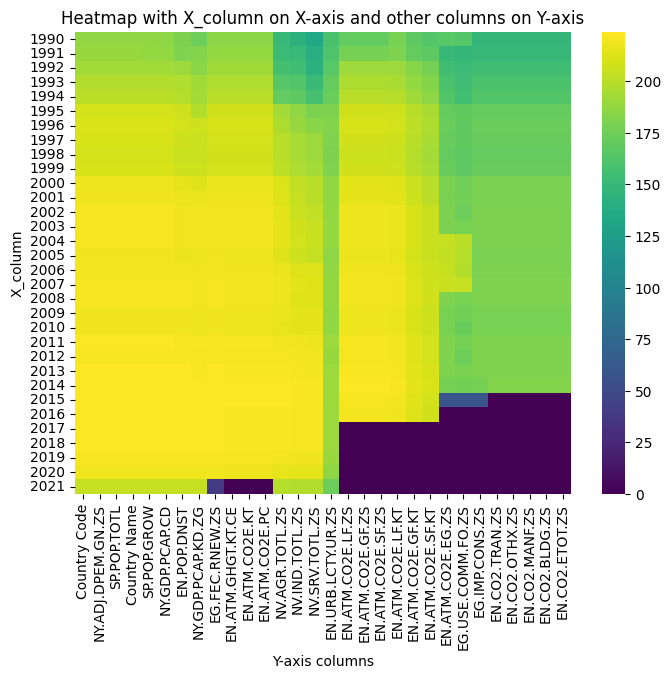

In [1081]:
# Set 'X_column' as the index for easier plotting
summary.set_index('Year', inplace=True)

# Generate heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(summary, cmap='viridis')  # Adjust the colormap ('cmap') as desired
plt.title('Heatmap with X_column on X-axis and other columns on Y-axis')
plt.xlabel('Y-axis columns')
plt.ylabel('X_column')
plt.show()

    # "EN.ATM.CO2E.KT",	    #6630	CO2 emissions (kt)
    # "EN.ATM.GHGT.KT.CE"

In [1082]:
summary_column_totals_df = pd.DataFrame({'Column Count': summary_column_totals})
column_totals_w_series_name = pd.merge(summary_column_totals_df, series_name_and_code, on='Series Code', how='inner')  # 'inner' join by default
column_totals_w_series_name.sort_values(by="Column Count", ascending = True, inplace = True)
column_totals_w_series_name.tail()

,Series Code,Column Count,Series Name
18,EN.POP.DNST,6819,Population density (people per sq. km of land area)
24,NY.GDP.PCAP.CD,6864,GDP per capita (current US$)
26,SP.POP.GROW,6865,Population growth (annual %)
23,NY.ADJ.DPEM.GN.ZS,6866,Adjusted savings: particulate emission damage (% of GNI)
27,SP.POP.TOTL,6866,"Population, total"


C:\Users\husee\AppData\Local\Temp\ipykernel_28848\1935133705.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


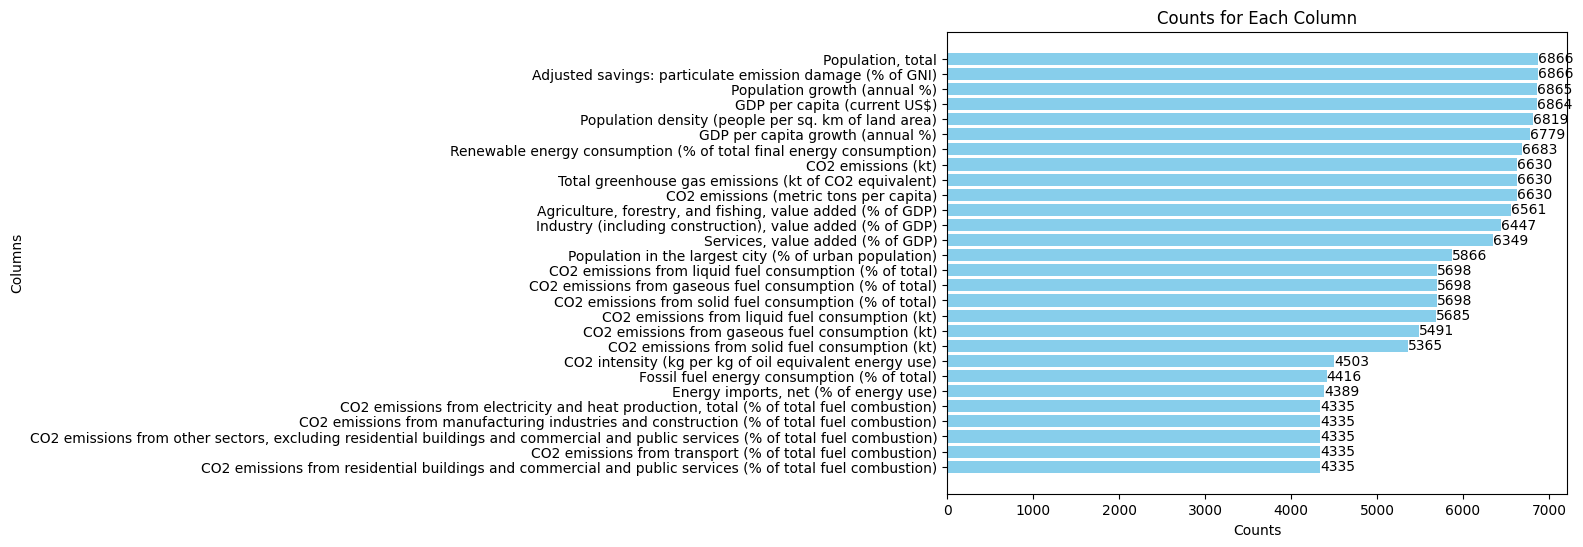

In [1083]:
# Plotting a horizontal bar graph for the year 2021 with labels
plt.figure(figsize=(8, 6))
bars = plt.barh(column_totals_w_series_name['Series Name'], column_totals_w_series_name['Column Count'], color='skyblue')  # Convert Series Code to string for categorical display

# Add labels on top of the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Counts for Each Column')
plt.xlabel('Counts')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

### Drop/input NAs, move forward

In [1121]:
cleaned_wb = wb_pivot.dropna()
cleaned_wb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3424 entries, 78 to 8735
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       3424 non-null   object 
 1   Country Code       3424 non-null   object 
 2   Year               3424 non-null   int64  
 3   EG.FEC.RNEW.ZS     3424 non-null   float64
 4   EG.IMP.CONS.ZS     3424 non-null   float64
 5   EG.USE.COMM.FO.ZS  3424 non-null   float64
 6   EN.ATM.CO2E.EG.ZS  3424 non-null   float64
 7   EN.ATM.CO2E.GF.KT  3424 non-null   float64
 8   EN.ATM.CO2E.GF.ZS  3424 non-null   float64
 9   EN.ATM.CO2E.KT     3424 non-null   float64
 10  EN.ATM.CO2E.LF.KT  3424 non-null   float64
 11  EN.ATM.CO2E.LF.ZS  3424 non-null   float64
 12  EN.ATM.CO2E.PC     3424 non-null   float64
 13  EN.ATM.CO2E.SF.KT  3424 non-null   float64
 14  EN.ATM.CO2E.SF.ZS  3424 non-null   float64
 15  EN.ATM.GHGT.KT.CE  3424 non-null   float64
 16  EN.CO2.BLDG.ZS     3424 non-

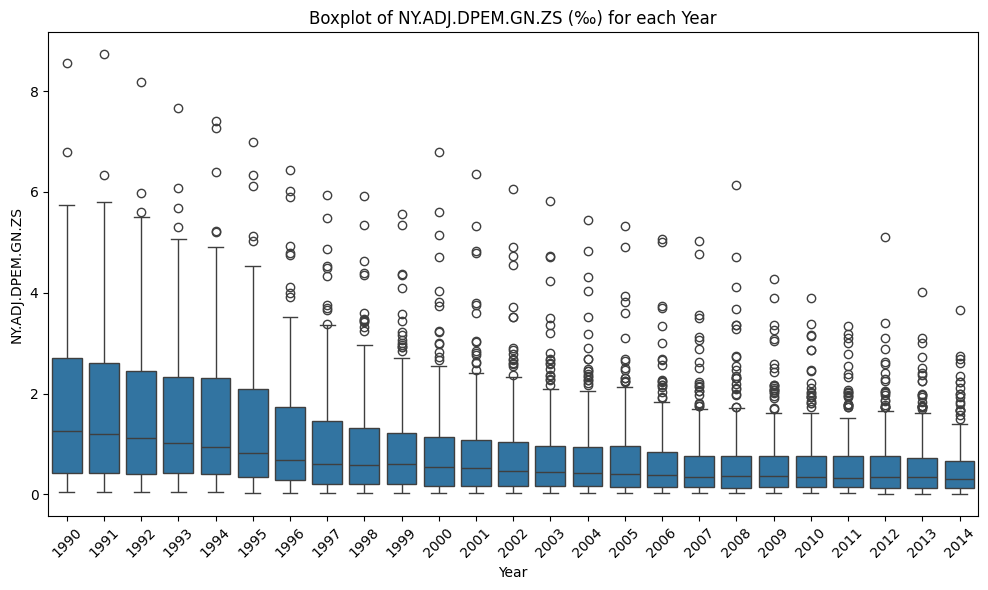

In [1122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort DataFrame by 'Year' in ascending order
wb_sorted = cleaned_wb.sort_values(by='Year')

# wb_sorted['NY.ADJ.DPEM.GN.ZS'] = wb_sorted['NY.ADJ.DPEM.GN.ZS']*10

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='NY.ADJ.DPEM.GN.ZS', data=wb_sorted)
plt.title('Boxplot of NY.ADJ.DPEM.GN.ZS (‰) for each Year')
plt.xlabel('Year')
plt.ylabel('NY.ADJ.DPEM.GN.ZS')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [1114]:
w_total = wb_sorted[wb_sorted["Country Name"] == "World"]

# World GHG trend

# plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
# # plt.plot(w_total['Year'], w_total['EN.ATM.CO2E.KT'], label='CO2', marker='o')  # Plot Measure1
# plt.plot(w_total['Year'], w_total['EN.ATM.GHGT.KT.CE'], label='GHG', marker='o')  # Plot Measure2

# # Adding labels and title
# plt.xlabel('Year')
# plt.ylabel('GHG')
# plt.title('World GHG over the Years')

# # Adding legend
# plt.legend()

# # Show plot
# plt.grid(True)
# plt.tight_layout()
# plt.show()

### Input

In [1115]:
# cleaned_inputted = wb_pivot.ffill().bfill().dropna()
# cleaned_inputted.info(verbose=True)

In [1116]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sort DataFrame by 'Year' in ascending order
# df_sorted = cleaned_inputted.sort_values(by='Year')

# df_sorted['NY.ADJ.DPEM.GN.ZS'] = df_sorted['NY.ADJ.DPEM.GN.ZS']*10

# # Create boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Year', y='NY.ADJ.DPEM.GN.ZS', data=df_sorted)
# plt.title('Boxplot of NY.ADJ.DPEM.GN.ZS (‰) for each Year')
# plt.xlabel('Year')
# plt.ylabel('NY.ADJ.DPEM.GN.ZS')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
# plt.tight_layout()
# plt.show()

### Data manipulation

In [1135]:
wb_sorted[wb_sorted.isnull().any(axis=1)]

# wb_sorted[(wb_sorted[non_percentage_columns] < 0).any(axis=1)]


Series Code,Country Name,Country Code,Year,EG.FEC.RNEW.ZS,EG.IMP.CONS.ZS,EG.USE.COMM.FO.ZS,EN.ATM.CO2E.EG.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGT.KT.CE,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,EN.URB.LCTY.UR.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.ADJ.DPEM.GN.ZS,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD.ZG,SP.POP.GROW,SP.POP.TOTL
1222,Cameroon,CMR,1991,83.19,-113.303403,17.388548,4.610426,4.60517,0.0,8.863078,NaN,-6.088604,4.611067,4.641184,0.138377,10.333238,27.983539,1.646091,6.17284,0.0,64.609053,4.827636,20.781491,24.259026,28.881504,44.697922,2.554832,7.007876,-6.644255,2.992256,16.281729


In [1146]:
cleaned_wb[cleaned_wb.index == 1222]

Series Code,Country Name,Country Code,Year,EG.FEC.RNEW.ZS,EG.IMP.CONS.ZS,EG.USE.COMM.FO.ZS,EN.ATM.CO2E.EG.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGT.KT.CE,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,EN.URB.LCTY.UR.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.ADJ.DPEM.GN.ZS,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD.ZG,SP.POP.GROW,SP.POP.TOTL
1222,Cameroon,CMR,1991,83.19,-113.303403,17.388548,0.526926,0.0,0.0,6966.2,-161.348,-6.088604,0.591473,3.667,0.138377,30637.48637,27.983539,1.646091,6.17284,0.0,64.609053,24.915316,20.781491,24.259026,28.881504,44.697922,2.554832,1005.304363,-6.644255,2.992256,11777719.0


In [1149]:
wb_sorted = cleaned_wb.sort_values(by='Year').dropna()

non_percentage_columns  = [
    "EN.ATM.CO2E.EG.ZS", #	4503	CO2 intensity (kg per kg of oil equivalent energy use)
    "EN.ATM.CO2E.SF.KT", #	5365	CO2 emissions from solid fuel consumption (kt)
    "EN.ATM.CO2E.GF.KT", #	5491	CO2 emissions from gaseous fuel consumption (kt)
    "EN.ATM.CO2E.LF.KT", #	5685	CO2 emissions from liquid fuel consumption (kt)
    "EN.ATM.CO2E.PC", #	6630	CO2 emissions (metric tons per capita)
    "EN.ATM.CO2E.KT", #	6630	CO2 emissions (kt)
    "EN.ATM.GHGT.KT.CE", #	6630	Total greenhouse gas emissions (kt of CO2 equivalent)
    "EN.POP.DNST", #	6819	Population density (people per sq. km of land area)
    "NY.GDP.PCAP.CD", #	6864	GDP per capita (current US$)
    "SP.POP.TOTL" #	6866	Population, total
]

wb_sorted[non_percentage_columns] = wb_sorted[non_percentage_columns].applymap(lambda x: max(0, x))

## Apply log transformation to non percentage columns
wb_sorted[non_percentage_columns] = wb_sorted[non_percentage_columns].apply(lambda x: np.log(x+10))

C:\Users\husee\AppData\Local\Temp\ipykernel_28848\1917651499.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  wb_sorted[non_percentage_columns] = wb_sorted[non_percentage_columns].applymap(lambda x: max(0, x))


In [1150]:
# Exclude region aggregations
only_countries = [item for item in list(wb_sorted["Country Name"].unique()) if not any(substring in item.lower() for substring in ['europe', 'western', 'eastern', 'members','north america', 'world', 'income', 'total', 'countries', 'area', 'sub-saharan', 'ibrd', 'ida', 'only', 'dividend', ' & '])]
wb_sorted = wb_sorted[wb_sorted["Country Name"].isin(only_countries)]

In [1151]:
wb_sorted.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2645 entries, 3135 to 2268
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       2645 non-null   object 
 1   Country Code       2645 non-null   object 
 2   Year               2645 non-null   int64  
 3   EG.FEC.RNEW.ZS     2645 non-null   float64
 4   EG.IMP.CONS.ZS     2645 non-null   float64
 5   EG.USE.COMM.FO.ZS  2645 non-null   float64
 6   EN.ATM.CO2E.EG.ZS  2645 non-null   float64
 7   EN.ATM.CO2E.GF.KT  2645 non-null   float64
 8   EN.ATM.CO2E.GF.ZS  2645 non-null   float64
 9   EN.ATM.CO2E.KT     2645 non-null   float64
 10  EN.ATM.CO2E.LF.KT  2645 non-null   float64
 11  EN.ATM.CO2E.LF.ZS  2645 non-null   float64
 12  EN.ATM.CO2E.PC     2645 non-null   float64
 13  EN.ATM.CO2E.SF.KT  2645 non-null   float64
 14  EN.ATM.CO2E.SF.ZS  2645 non-null   float64
 15  EN.ATM.GHGT.KT.CE  2645 non-null   float64
 16  EN.CO2.BLDG.ZS     2645 no

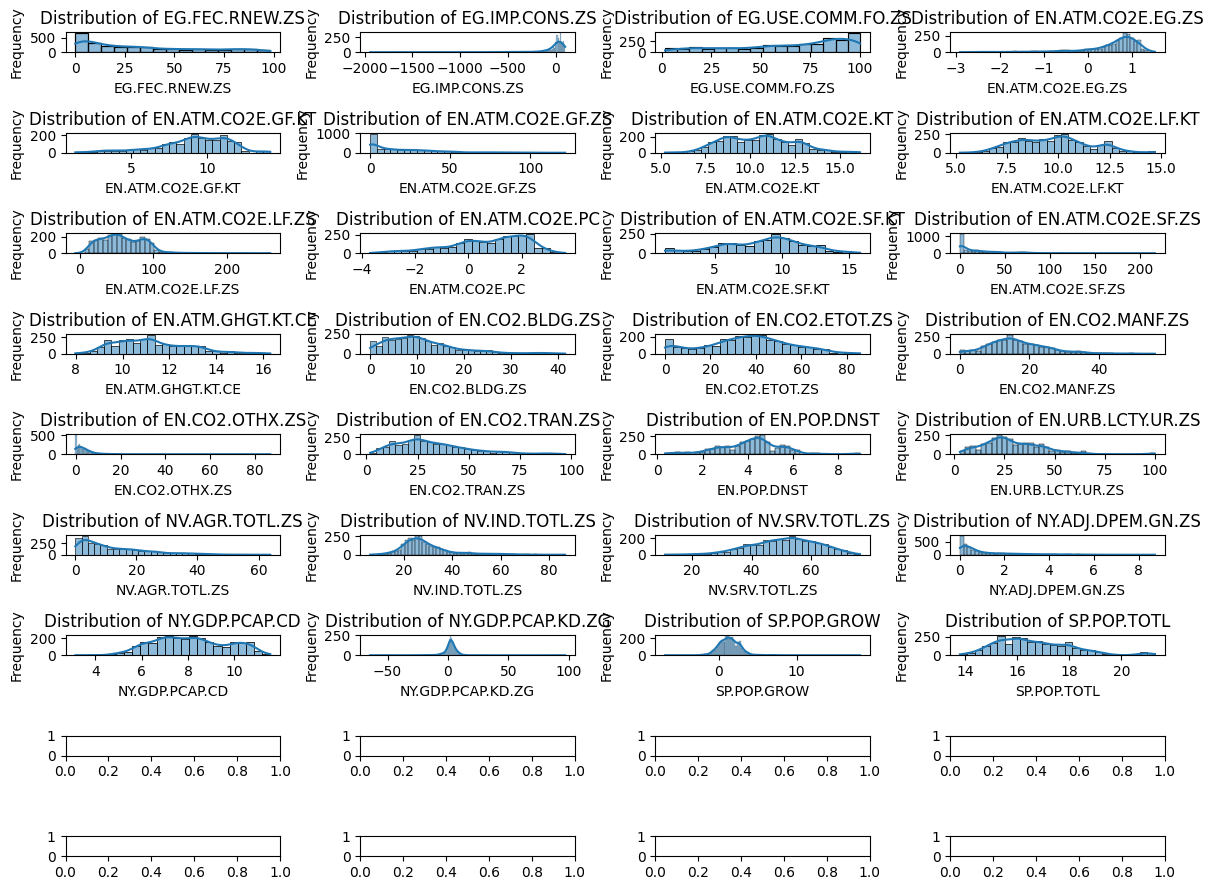

In [1092]:
# Assuming 'df' is your DataFrame
numeric_columns = wb_sorted.select_dtypes(include='float64').columns  # Select only numeric columns

num_plots = len(numeric_columns)
rows = num_plots // 3  # Adjust the number of rows for subplot arrangement
cols = 4  # Number of columns for subplot arrangement
fig, axes = plt.subplots(rows, cols, figsize=(12, 9))  # Create subplots

for i, col in enumerate(numeric_columns):
    ax = axes[i // cols, i % cols] if num_plots > 1 else axes  # For single plot, axes is not an array
    sns.histplot(wb_sorted[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## ETS database join


| Item                             | Description                                                                                                    |
|----------------------------------|----------------------------------------------------------------------------------------------------------------|
| 1. Total allocated allowances    | Total number of allocated allowances.                                                                           |
| 1.1. Freely allocated allowances | Total number of allowances received free of charge. This does not include allowances bought through auctioning.  |
| 1.1.1 Free allocation to existing entities (Art. 10a(1)) | Number of allowances received free of charge by existing entities under Art. 10a(1) of the ETS Directive. |
| 1.1.2 Free allocation from the new entrants reserve (Art. 10 a(7)) | Number of allowances received free of charge by new entities under Art. 10a(7) of the ETS Directive. |
| 1.1.3 Free allocation for modernisation of electricity generation (Art. 10c) | Number of allowances received free of charge for a transitional period by electricity generators under Art. 10c of the ETS Directive to help modernise production. |
| 1.2. Correction to freely allocated allowances (not reflected in EUTL) | Correction of the number of allowances allocated free of charge due to transfers of allowances in six countries and adjustment of free allocation for aviation operators in the year 2012 due to the ‘stop the clock’ decision. |
| 1.3 Allowances auctioned or sold (EUAs and EUAAs) | Number of EUAs and EUAAs auctioned or sold by participating countries. |
| 2. Verified emissions            | Emissions of installations and aviation operators verified by an independent third party.                     |
| 3. Estimates to reflect current scope for allowances and emissions | Estimates to reflect current ETS scope in the period 2005 to 2012 to be added to allowances and verified emissions for a consistent comparison between years and trading periods. |
| 4. Total surrendered units       | Total number of emission trading units surrendered by operators to their authorities for compliance under the EU ETS. Each unit represents one tonne of CO2-eq. |
| 4.1 Surrendered EU allowances (EUAs and EUAAs) | Allowances surrendered by operators of stationary installations or allowances and aviation allowances surrendered by aviation operators. |
| 4.2 Surrendered certified emission reductions (CERs) | CERs originating from Clean Development Mechanism projects under the Kyoto Protocol in non-Annex 1 countries. In the third trading period, only the total number of surrendered units is publicly available (no detail on the type of unit surrendered is publicly available). |
| 4.3 Surrendered emission reduction units (ERUs) | ERUs originating from Joint Implementation projects under the Kyoto Protocol in Annex 1 countries. In the third trading period, only the total number of surrendered units is publicly available (no detail on the type of unit surrendered is publicly available). |


In [1093]:
ets = pd.read_csv("C:\\Users\\husee\\Desktop\\thesis_2023\\Structured\\Data\\ETS database\\ETS_Database_Jul23.csv", sep = "\t", on_bad_lines='warn')
# Remove rows summarizing the totals of trading period
ets = ets[ets['year'].str.len() <= 4]
# Convert year to numeric
ets['year'] = ets['year'].astype(int)
# Filter to aggregated all stationary installations and aviation as sectors
ets = ets[ets['main activity sector name'].isin(['10 Aviation', '20-99 All stationary installations'])]
# Filter to verified emissions, free allowances and correction to free allowances
ets = ets[ets["ETS information"].isin(["1.1 Freely allocated allowances","2. Verified emissions","1.2 Correction to freely allocated allowances (not reflected in EUTL)"])]
print(ets.shape)
ets.head()

(2274, 7)


,country,country_code,ETS information,main activity sector name,unit,value,year
43,Spain,ES,1.1 Freely allocated allowances,10 Aviation,tonne of CO2 equ.,2924917.0,2016
44,Spain,ES,1.1 Freely allocated allowances,10 Aviation,tonne of CO2 equ.,4708155.0,2020
49,Spain,ES,2. Verified emissions,10 Aviation,tonne of CO2 equ.,5229736.0,2014
50,Spain,ES,2. Verified emissions,10 Aviation,tonne of CO2 equ.,5766320.0,2015
229,Spain,ES,2. Verified emissions,10 Aviation,tonne of CO2 equ.,6397562.0,2016


In [1094]:
# Measures as columns
pivot_ets = ets.pivot_table(index=['year', 'country'], columns='ETS information', values='value', aggfunc='sum').reset_index()
# Country codes mapping
country_codes = {
    'Austria': 'AUT', 'Belgium': 'BEL', 'Bulgaria': 'BGR', 'Croatia': 'HRV', 'Cyprus': 'CYP', 'Czechia': 'CZE',
    'Denmark': 'DNK', 'Estonia': 'EST', 'Finland': 'FIN', 'France': 'FRA', 'Germany': 'DEU', 'Greece': 'GRC',
    'Hungary': 'HUN', 'Iceland': 'ISL', 'Ireland': 'IRL', 'Italy': 'ITA', 'Latvia': 'LVA', 'Liechtenstein': 'LIE',
    'Lithuania': 'LTU', 'Luxembourg': 'LUX', 'Malta': 'MLT', 'Netherlands': 'NLD', 'Northern Ireland': 'GBR', # Northern Ireland is not a separate entity for the World Bank.
    'Norway': 'NOR', 'Poland': 'POL', 'Portugal': 'PRT', 'Romania': 'ROU', 'Slovakia': 'SVK', 'Slovenia': 'SVN',
    'Spain': 'ESP', 'Sweden': 'SWE', 'United Kingdom (excl. NI)': 'GBR' # Excluding Northern Ireland, UK is represented by GBR
}

# Create a new column 'country_codes' by mapping 'country' column values to country codes
pivot_ets['Country Code'] = pivot_ets['country'].map(country_codes)

# Aggregate UK and Northern Ireland emissions
ets_aggregated = pivot_ets.groupby(['year', 'Country Code']).sum().reset_index()

# Rename columns for easy reference
ets_aggregated.rename(columns={'year': 'Year',
                              '1.1 Freely allocated allowances': 'free_allocated',
                              '1.2 Correction to freely allocated allowances (not reflected in EUTL)' : 'correction_to_free_allocated',
                              '2. Verified emissions' : 'verified'}, inplace=True)


ets_aggregated.head()

ETS information,Year,Country Code,country,free_allocated,correction_to_free_allocated,verified
0,2005,AUT,Austria,32412654.0,0.0,33373155.0
1,2005,BEL,Belgium,58309908.0,0.0,55363232.0
2,2005,BGR,Bulgaria,0.0,0.0,0.0
3,2005,CYP,Cyprus,0.0,0.0,5078877.0
4,2005,CZE,Czechia,96919971.0,0.0,82454636.0


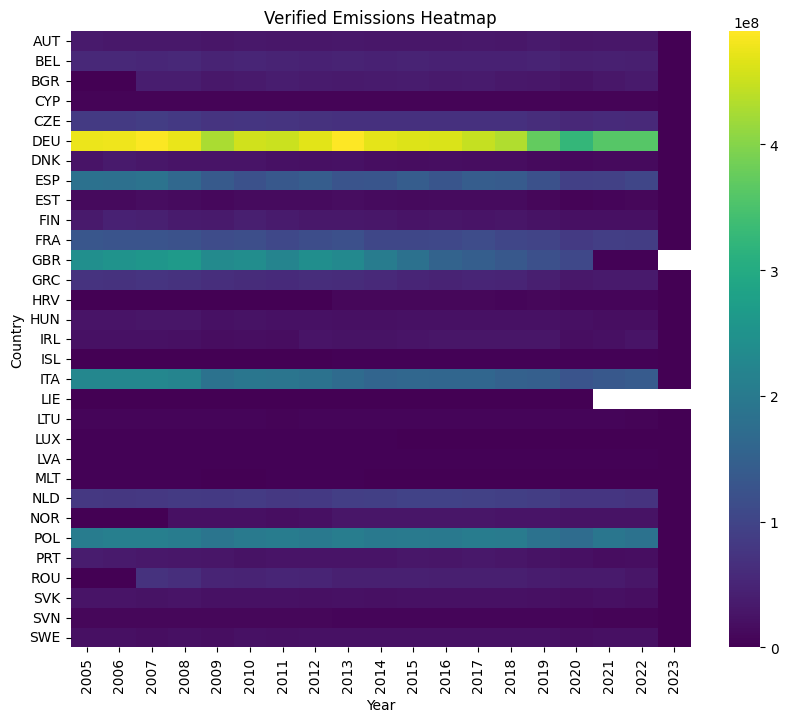

In [1095]:
# Group by 'Country' and 'Year', then summarize the sum on 'Value'
verified_emissions_agg = ets_aggregated.pivot_table(index='Country Code', columns='Year', values='verified', aggfunc='sum')

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(verified_emissions_agg, cmap='viridis')  # Adjust the colormap ('cmap') as desired
plt.title('Verified Emissions Heatmap')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

## Model Building

**ETS Countries**

The ratio of emissions subject to transaction and/or fee can be calculated using the following formula:

In [1096]:
%%latex
\[
\text{Ratio of emissions subject to GHG market} = \frac{\text{ETS verified GHG emissions} - \text{ETS freely allocated GHG emissions}}{\text{Total GHG emissions}}
\]

<IPython.core.display.Latex object>

### Next steps

1. Left join wdb and ets, bring ets related information to columns
2. Calculate subject to market rate, it is 0 for pre-ets and non-ets countries, also it is 0 when it is negative
3. Select, manipulate/scale columns
4. Run the panel analysis

#### WorldBank Indicators

In [1152]:
# Columns to include from the ets_aggregated DataFrame
ets_cols = ['free_allocated', 'correction_to_free_allocated',	'verified']

# Perform the merge and include only specific columns from the second DataFrame
wb_ets_joined = pd.merge(
    wb_sorted,
    ets_aggregated[columns_to_include + ['Year', 'Country Code']],  # Include the 'year' column for merging
    on=["Year", "Country Code"]	,
    how="left"
)

# Fill NAs wih 0s
wb_ets_joined[ets_cols] = wb_ets_joined[ets_cols].fillna(0)

print(wb_ets_joined.shape)
wb_ets_joined.head()

(2645, 34)


,Country Name,Country Code,Year,EG.FEC.RNEW.ZS,EG.IMP.CONS.ZS,EG.USE.COMM.FO.ZS,EN.ATM.CO2E.EG.ZS,EN.ATM.CO2E.GF.KT,EN.ATM.CO2E.GF.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.LF.KT,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.PC,EN.ATM.CO2E.SF.KT,EN.ATM.CO2E.SF.ZS,EN.ATM.GHGT.KT.CE,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,EN.URB.LCTY.UR.ZS,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,NV.SRV.TOTL.ZS,NY.ADJ.DPEM.GN.ZS,NY.GDP.PCAP.CD,NY.GDP.PCAP.KD.ZG,SP.POP.GROW,SP.POP.TOTL,free_allocated,correction_to_free_allocated,verified
0,Guatemala,GTM,1990,74.950000,23.334874,27.867257,2.387930,3.344098,0.466539,8.279443,8.353588,107.770611,2.345115,2.302585,0.000000,9.332927,14.641745,7.476636,22.118380,2.492212,53.271028,4.548115,38.105777,25.879160,19.787760,54.333081,2.786856,6.751470,0.321450,2.734473,16.018289,0.0,0.0,0.0
1,South Africa,ZAF,1990,16.630000,-25.923064,86.156007,2.543400,8.148151,1.391819,12.419670,10.612968,16.413105,2.785590,12.488710,107.128638,12.700338,4.642769,59.810516,22.192601,1.238619,12.115495,3.758236,10.385073,3.777056,35.607601,52.439080,1.392814,8.061764,-3.339621,3.078394,17.501325,0.0,0.0,0.0
2,Norway,NOR,1990,59.170000,-467.106797,52.053005,2.432390,8.419598,15.496842,10.285868,9.996006,75.098151,2.827861,8.097010,11.214490,10.738517,9.031318,26.620539,22.723962,5.061908,36.525856,3.073282,22.412462,2.984020,29.530140,56.358445,0.084534,10.248954,1.582093,0.344151,15.260424,0.0,0.0,0.0
3,Cote d'Ivoire,CIV,1990,73.590000,22.154243,23.704350,2.363086,2.302585,0.000000,7.906695,8.475420,176.584317,2.325045,2.302585,0.000000,9.109154,14.814815,22.222222,14.814815,4.814815,44.074074,3.859772,44.856133,32.498428,26.267211,41.234362,4.241625,6.820466,-4.812715,3.830424,16.292935,0.0,0.0,0.0
4,South Asia,SAS,1990,55.743319,10.080388,52.147259,2.461060,10.905096,8.017269,13.371256,12.221559,31.476342,2.357252,12.938682,64.842731,14.252411,11.312360,41.944052,27.821034,5.158131,13.764423,5.516682,10.026620,27.675225,26.237001,38.572396,4.156124,5.904266,3.056673,2.254630,20.855445,0.0,0.0,0.0


In [1154]:
# Pct of GHG emissions covered by EU ETS
wb_ets_joined["ETS_verified_pct"] = 100 * wb_ets_joined.verified/1000 / wb_ets_joined["EN.ATM.GHGT.KT.CE"]
# Pct of GHG emissions covered by EU ETS and subject to transaction
wb_ets_joined["ETS_market_pct"] = 100 * (wb_ets_joined.verified - wb_ets_joined.free_allocated - wb_ets_joined.correction_to_free_allocated) /1000 / wb_ets_joined["EN.ATM.GHGT.KT.CE"]

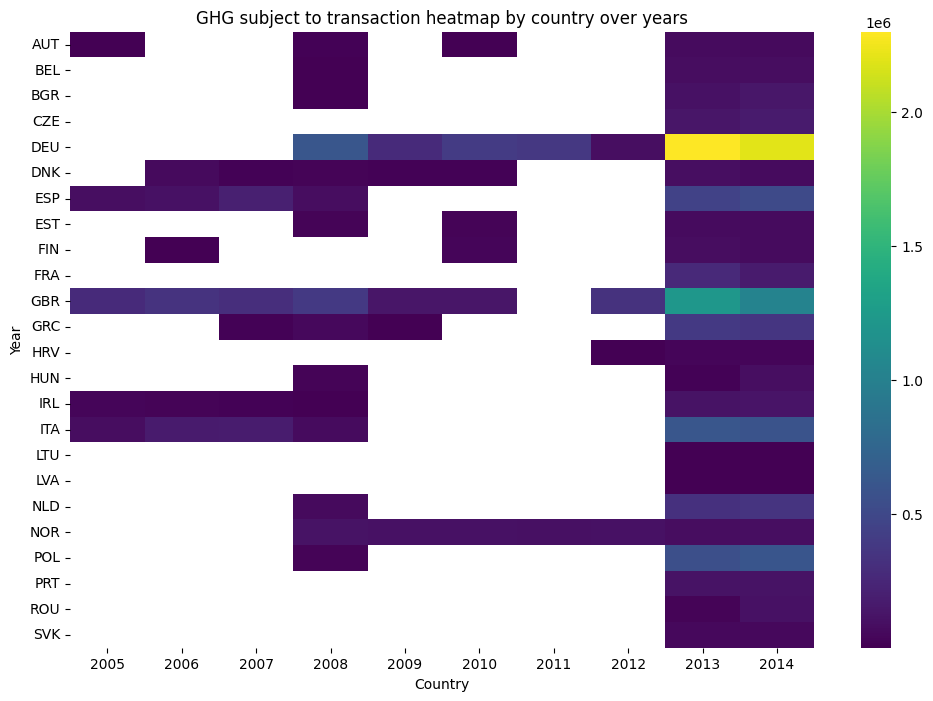

In [1155]:
heatmap_data = wb_ets_joined[wb_ets_joined["ETS_market_pct"]>0]
heatmap_data = heatmap_data.pivot(index='Country Code', columns='Year', values='ETS_market_pct')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="viridis")
# Set labels and title
plt.xlabel('Country')
plt.ylabel('Year')
plt.title('GHG subject to transaction heatmap by country over years')
# Show the plot
plt.show()

## Random Forest Algo

In [1156]:
from sklearn.model_selection import train_test_split

X = wb_ets_joined.drop(['NY.ADJ.DPEM.GN.ZS',
                        'Country Name', 
                        'Country Code', 
                        'Year',
                        'free_allocated',
                        'correction_to_free_allocated',
                        'verified'], axis=1)
y = wb_ets_joined['NY.ADJ.DPEM.GN.ZS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
## stratify = y makes sure that the split in both labels are proportional

In [1157]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


def print_regression_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        clf.fit(X_train, y_train)
        result_type = "Train Result"
        y_pred = clf.predict(X_train)
        y_true = y_train
    else:
        result_type = "Test Result"
        y_pred = clf.predict(X_test)
        y_true = y_test

    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)


    print(f"{result_type}:\n{'=' * 48}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print("=" * 48)

In [1158]:
# Assuming X_train, X_test, y_train, y_test are your train-test splits for regression

# Instantiate RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)

# Train and print regression scores
print_regression_score(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_regression_score(rf_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Root Mean Squared Error (RMSE): 0.13
R-squared (R2): 0.99
Test Result:
Root Mean Squared Error (RMSE): 0.29
R-squared (R2): 0.95


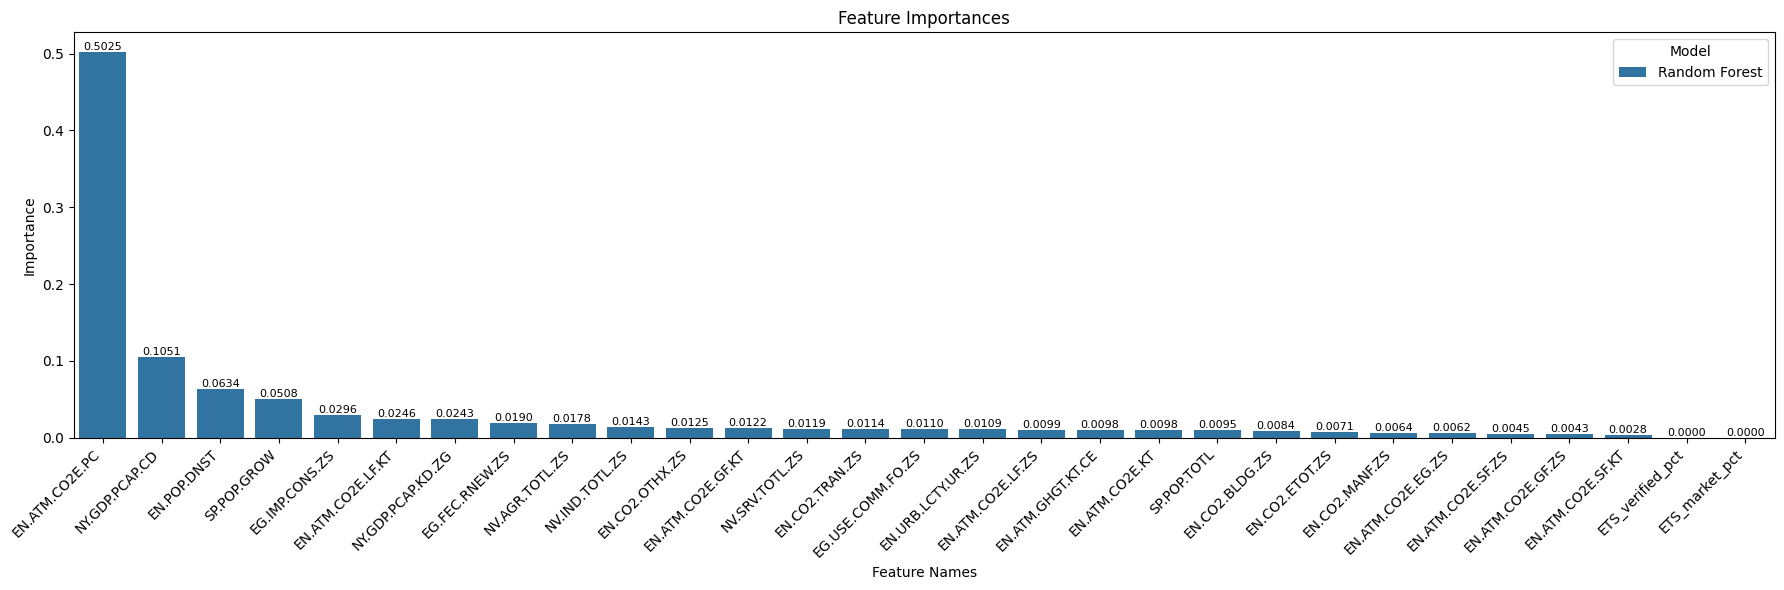

In [1159]:
# Get feature importances for the model
importances_rf = rf_reg.feature_importances_

# Feature names
feature_names = X_train.columns

data = {
    'Feature Names': list(feature_names),
    'Importance': importances_rf,
    'Model': ['Random Forest'] * len(feature_names)
}
df = pd.DataFrame(data)
df = df.sort_values(by='Importance', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(18, 6))
sns.barplot(x='Feature Names', y='Importance', hue='Model', data=df, palette='tab10')

# Add labels (importance values) to the top of bars
for index, value in enumerate(df['Importance']):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

# Set the x-axis labels and title, adjust rotation for better readability
plt.xticks(rotation=45, ha="right")
plt.title('Feature Importances')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
indicators_used = [
    # "EN.ATM.PM25.MC.ZS", #	2614	PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)
    # "EN.ATM.PM25.MC.M3", #	3059	PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
    "EN.CO2.BLDG.ZS", #	4335	CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)
    "EN.CO2.TRAN.ZS", #	4335	CO2 emissions from transport (% of total fuel combustion)
    "EN.CO2.OTHX.ZS", #	4335	CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)
    "EN.CO2.MANF.ZS", #	4335	CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
    "EN.CO2.ETOT.ZS", #	4335	CO2 emissions from electricity and heat production, total (% of total fuel combustion)
    "EG.IMP.CONS.ZS", #	4389	Energy imports, net (% of energy use)
    "EG.USE.COMM.FO.ZS", #	4416	Fossil fuel energy consumption (% of total)
    "EN.ATM.CO2E.EG.ZS", #	4503	CO2 intensity (kg per kg of oil equivalent energy use)
    # "NY.ADJ.DPEM.CD", #	5342	Adjusted savings: particulate emission damage (current US$)
    "EN.ATM.CO2E.SF.KT", #	5365	CO2 emissions from solid fuel consumption (kt)
    "EN.ATM.CO2E.GF.KT", #	5491	CO2 emissions from gaseous fuel consumption (kt)
    "EN.ATM.CO2E.LF.KT", #	5685	CO2 emissions from liquid fuel consumption (kt)
    "EN.ATM.CO2E.SF.ZS", #	5698	CO2 emissions from solid fuel consumption (% of total)
    "EN.ATM.CO2E.LF.ZS", #	5698	CO2 emissions from liquid fuel consumption (% of total)
    "EN.ATM.CO2E.GF.ZS", #	5698	CO2 emissions from gaseous fuel consumption (% of total)
    "EN.URB.LCTY.UR.ZS", #	5866	Population in the largest city (% of urban population)
    "NV.SRV.TOTL.ZS", #	6349	Services, value added (% of GDP)
    "NV.IND.TOTL.ZS", #	6447	Industry (including construction), value added (% of GDP)
    "NV.AGR.TOTL.ZS", #	6561	Agriculture, forestry, and fishing, value added (% of GDP)
    "EN.ATM.CO2E.PC", #	6630	CO2 emissions (metric tons per capita)
    "EN.ATM.CO2E.KT", #	6630	CO2 emissions (kt)
    "EN.ATM.GHGT.KT.CE", #	6630	Total greenhouse gas emissions (kt of CO2 equivalent)
    "EG.FEC.RNEW.ZS", #	6683	Renewable energy consumption (% of total final energy consumption)
    "NY.GDP.PCAP.KD.ZG", #	6779	GDP per capita growth (annual %)
    "EN.POP.DNST", #	6819	Population density (people per sq. km of land area)
    "NY.GDP.PCAP.CD", #	6864	GDP per capita (current US$)
    "SP.POP.GROW", #	6865	Population growth (annual %)
    "NY.ADJ.DPEM.GN.ZS", #	6866	Adjusted savings: particulate emission damage (% of GNI)
    "SP.POP.TOTL" #	6866	Population, total
]

wb = wb[wb["Series Code"].isin(indicators_used)]
wb.shape

### Next steps

1. Find a way to convert columns to log without errors
2. Exclude very well self explanatory variables and include more irrelevant ones?
3. It is strange that CO2 emissions is explanatory but not the GHG emissions
4. Create parameter grid for random forest and make parameter search (try less iterations)
5. Prepare Xgboost and Gradient boosting models, with parameter search
6. Stack these 2 models and generate the final model
7. Compare, random forest, xgboost, gradient boosting, xg&gradient

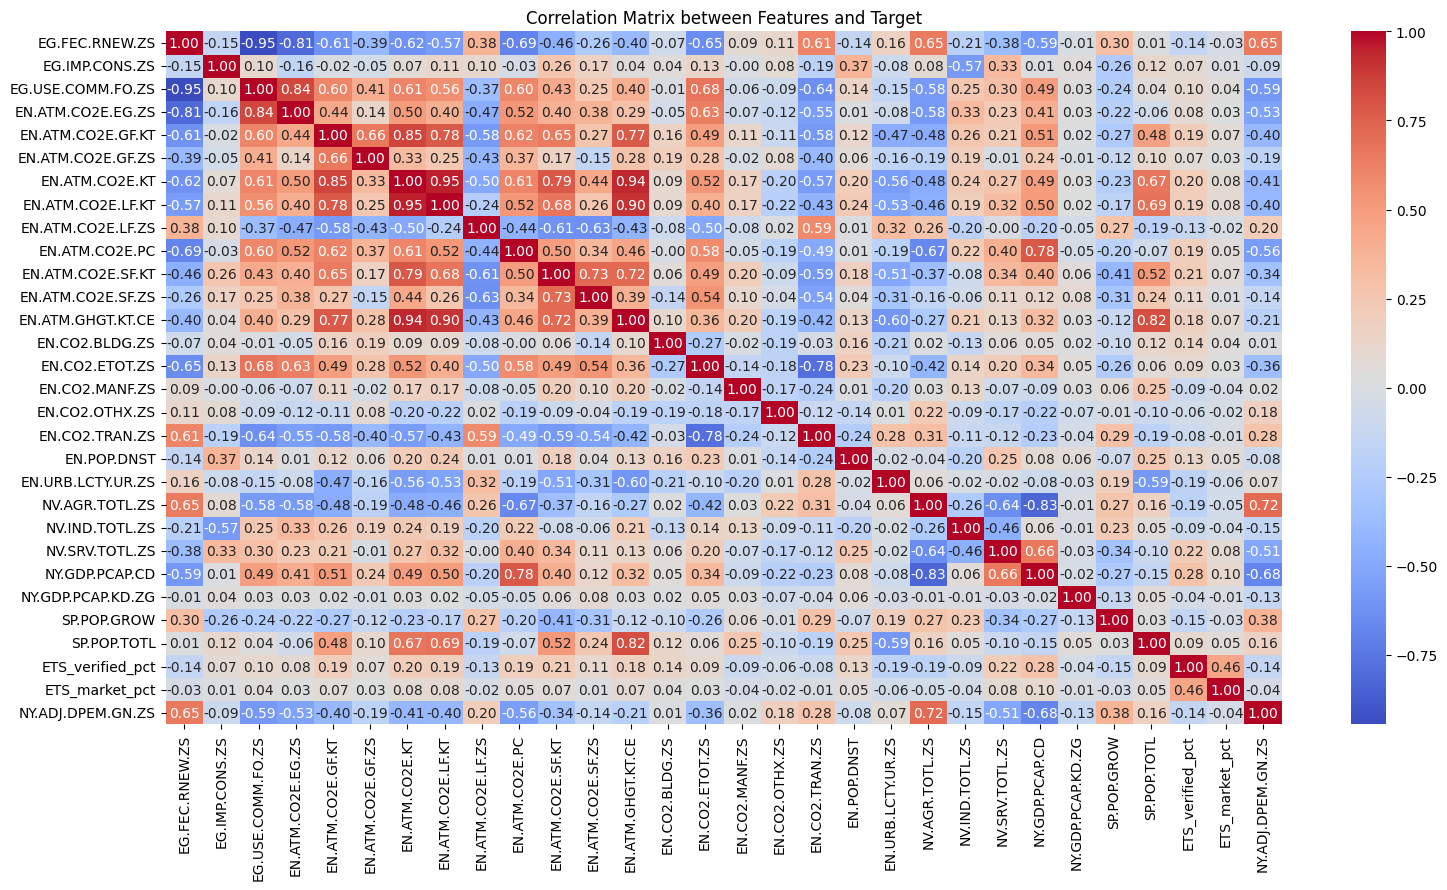

In [1165]:
# # Concatenate X_train and Y_train
# combined_data = pd.concat([X_train, y_train], axis=1)

# # Calculate the correlation matrix
# correlation_matrix = combined_data.corr()

# # Plotting using Seaborn heatmap
# plt.figure(figsize=(18, 9))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
# plt.title('Correlation Matrix between Features and Target')
# plt.show()

### UNFCC flow

In [655]:
# Common function to read csv fules and parse propoerly

def process_csvs(file_obj):
    year_breakdown = list(file_obj.columns)
    year_breakdown[0] = "Party"
    gas_breakdown  = list(file_obj.iloc[0])
    gas_breakdown[0] = "Party"
    measure_breakdown  = list(file_obj.iloc[1])
    
    # Concatenating values index-wise using zip function
    year_gas = [str(num) + "|" + letter for num, letter in zip(year_breakdown, gas_breakdown)]
    year_gas_measure = [str(num) + "|" + letter for num, letter in zip(year_gas, measure_breakdown)]
    
    # Assign the row you want as column names
    new_header = year_gas_measure  # Replace 'desired_row_index' with the row index you want as column names
    file_obj = file_obj[2:]  # Skip rows above the desired row
    
    # Set the new header and reset the index
    file_obj.columns = new_header
    file_obj.reset_index(drop=True, inplace=True)

    # Pivot the file
    piv = file_obj.melt(id_vars=['Party|Party|Party', 'Year|Gas|Category \\ Unit'], var_name='Year', value_name='Value')
    # Split concataneted fields
    piv[["Year","Gas","Category \ Unit"]] = piv['Year'].str.split('|', expand=True)
    # Rename splitted fields
    piv = piv.rename(columns={'Party|Party|Party': 'Party', 'Year|Gas|Category \ Unit': 'Measure'})
    # Define the desired column order
    column_order = ['Party', 'Measure', 'Year', 'Gas', 'Category \ Unit', 'Value']  # Example order, adjust as needed
    # Reorder columns
    piv = piv[column_order]
    # Drop footnote rows
    piv.dropna(subset=['Measure'], inplace=True)
    # Remove dots from year colum
    years_remove_dots = piv["Year"].str.split('.', expand=True)
    piv["Year"] = years_remove_dots[0]
    # piv = piv[piv["Year"] != "Base Year"].astype(int)
    piv = piv[~piv['Year'].isin(['Last Inventory Year (2021)', 'Base year'])]
    piv["Year"] = piv["Year"].astype(int)

    return piv

In [656]:
unfcc_annex_1 = pd.read_csv("C:\\Users\\husee\\Desktop\\thesis_2023\\Structured\\Data\\UNFCC database\\UNFCC_Annex_I_6Jan24.csv", header=2)
unfcc_annex_1_cleaned = process_csvs(unfcc_annex_1)
print(unfcc_annex_1_cleaned.shape)
unfcc_annex_1_cleaned.head(5)

(163184, 6)


,Party,Measure,Year,Gas,Category \ Unit,Value
5376,Annex I,Total GHG emissions without LULUCF including indirect CO₂,1990,CO₂,kt,2706652.090401704
5377,Annex I,Total GHG emissions with LULUCF including indirect CO₂,1990,CO₂,kt,2908457.3604208105
5378,Annex I,Total GHG emissions without LULUCF,1990,CO₂,kt,15104972.943587359
5379,Annex I,Total GHG emissions with LULUCF,1990,CO₂,kt,13718955.791906625
5380,Annex I,2.B.2 Nitric Acid Production,1990,CO₂,kt,NaN


In [657]:
unfcc_annex_2 = pd.read_csv("C:\\Users\\husee\\Desktop\\thesis_2023\\Structured\\Data\\UNFCC database\\UNFCC_Annex_2_6Jan24.csv", header=2)
unfcc_annex_2_cleaned = process_csvs(unfcc_annex_2)
print(unfcc_annex_2_cleaned.shape)
unfcc_annex_2_cleaned.head(5)

(88536, 6)


,Party,Measure,Year,Gas,Category \ Unit,Value
0,Afghanistan,Total GHG emissions excluding LULUCF/LUCF,1990,CO₂,Gg,NaN
1,Afghanistan,Total GHG emissions including LULUCF/LUCF,1990,CO₂,Gg,NaN
2,Afghanistan,2.B Chemical Industry,1990,CO₂,Gg,NaN
3,Afghanistan,2.C Metal Production,1990,CO₂,Gg,NaN
4,Albania,Total GHG emissions excluding LULUCF/LUCF,1990,CO₂,Gg,3101.66


In [737]:
unfcc_all = pd.concat([unfcc_annex_1_cleaned, unfcc_annex_2_cleaned])
unfcc_all = unfcc_all[~unfcc_all['Party'].str.contains('Annex')]
print(unfcc_all.dropna().shape)

(98205, 6)


C:\Users\husee\AppData\Local\Temp\ipykernel_28848\2415193467.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary = summary.applymap(lambda x: 1 if x > 0 else x)


48


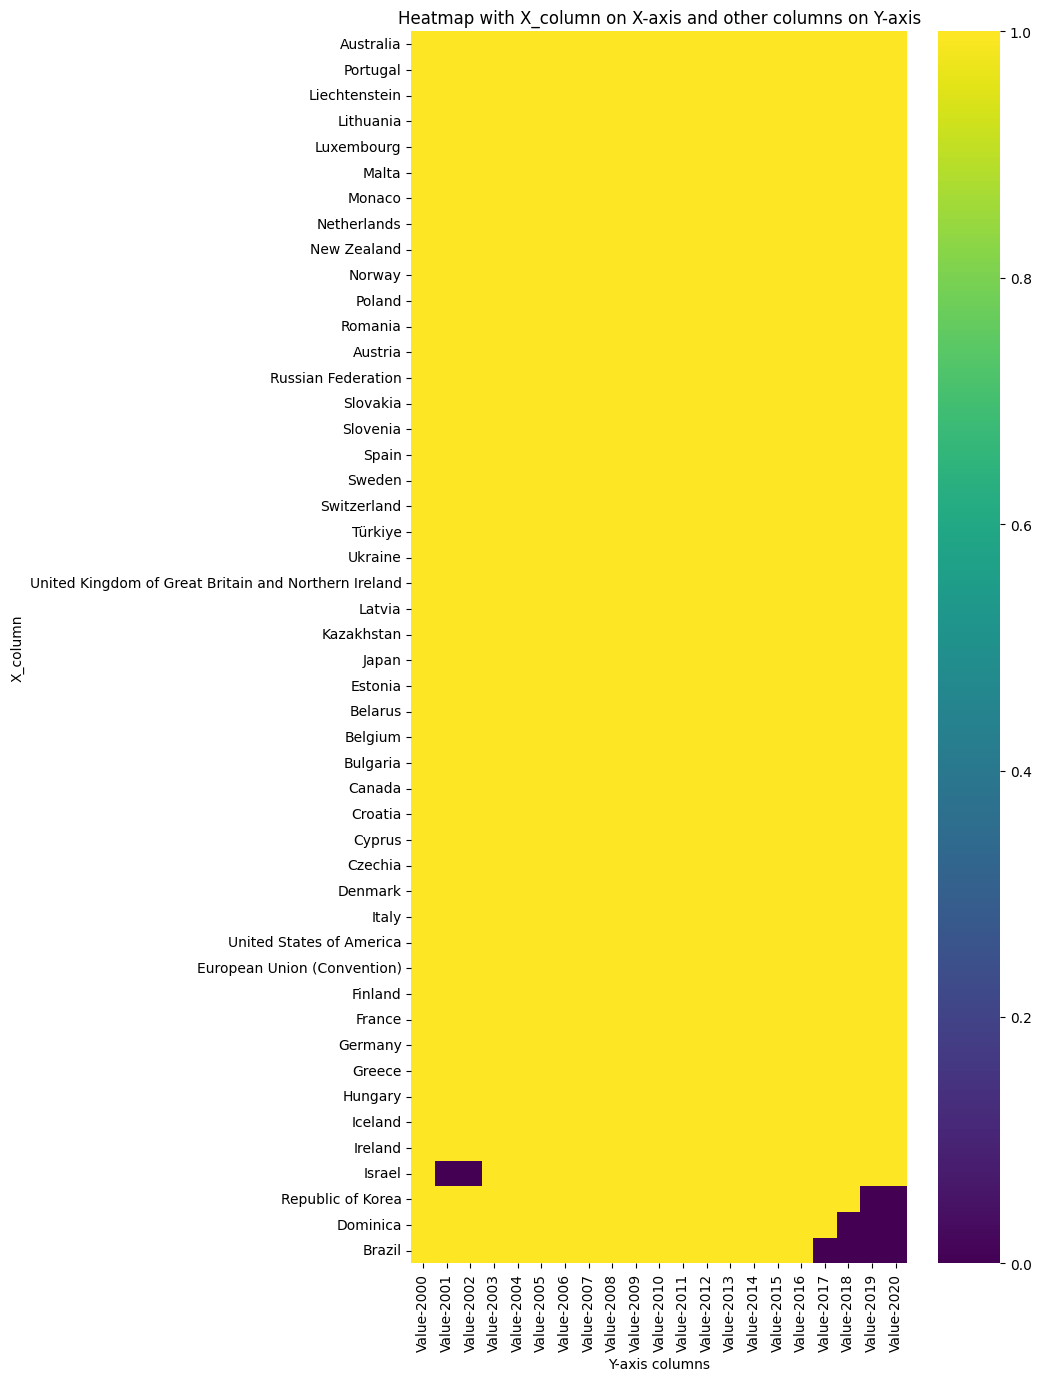

In [738]:
def count_non_null(x):
    return np.sum(~pd.isnull(x))

# Filter after year 2000
after_2000 = unfcc_all[(unfcc_all["Year"] > 1999) & (unfcc_all["Measure"].isin(["Total GHG emissions including LULUCF/LUCF", "Total GHG emissions with LULUCF"]))]

# Use the custom function in pivot_table()
summary = after_2000[["Party","Year","Value"]].pivot_table(index='Party', columns = 'Year', aggfunc=count_non_null)
summary.reset_index(inplace=True)
summary.set_index("Party", inplace = True)

# Summarize 1 as data exists 0 as no data found
summary = summary.applymap(lambda x: 1 if x > 0 else x)
summary = summary[summary.sum(axis=1) > 15]
# Group by index and sum columns within each group
grouped = summary.groupby(summary.index).sum()
# Sort groups by the sum of values in descending order
sorted_groups = grouped.sum(axis=1).sort_values(ascending=False).index
# Reorder the DataFrame based on the sorted group index
summary = grouped.loc[sorted_groups]
summary.head()

# of countries
print(len(list(summary.index)))

# Generate heatmap
plt.figure(figsize=(8, 16))
sns.heatmap(summary, cmap='viridis')  # Adjust the colormap ('cmap') as desired
plt.title('Heatmap with X_column on X-axis and other columns on Y-axis')
plt.xlabel('Y-axis columns')
plt.ylabel('X_column')
plt.show()

In [739]:
unfcc_availablity = pd.DataFrame(grouped.sum(axis=1).sort_values(ascending=False))
unfcc_availablity.head()

,0
Party,
Australia,21
Portugal,21
Liechtenstein,21
Lithuania,21
Luxembourg,21


In [740]:
eu_ets_countries = [
    "Greece", "Sweden", "Ireland", "Italy", "Ukraine", "Latvia", "Liechtenstein", "Lithuania", 
    "Luxembourg", "Malta", "Monaco", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", 
    "Slovenia", "Hungary", "Iceland", "Germany", "Croatia", "Austria", "Belgium", 
    "United Kingdom of Great Britain and Northern Ireland", "Spain", "Cyprus", "European Union (Convention)", 
    "Denmark", "France", "Estonia", "Czechia", "Finland", "Norway"
]

unfcc_availablity[~unfcc_availablity.index.isin(eu_ets_countries)]

,0
Party,
Australia,21
New Zealand,21
Russian Federation,21
Switzerland,21
Türkiye,21
Kazakhstan,21
Japan,21
Belarus,21
Bulgaria,21


#### It is very less likely to build this model using UNFCCC emissions data because:

- Contries other than EU are not reporting constantly
- There are only 15 other countries that I can use, and it can be impossible to get a good matching between those countries and EUETS ones

### UNFCC EU only

In [418]:
unfcc = pd.read_csv("C:\\Users\\husee\\Desktop\\thesis_2023\\Structured\\Data\\UNFCC database\\UNFCCC_v26_EU_only.csv", sep = ",")
unfcc.shape

C:\Users\husee\AppData\Local\Temp\ipykernel_28848\1230044801.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  unfcc = pd.read_csv("C:\\Users\\husee\\Desktop\\thesis_2023\\Structured\\Data\\UNFCC database\\UNFCCC_v26_EU_only.csv", sep = ",")


(671236, 13)

In [415]:
pollutants_needed = [
    'All greenhouse gases - (CO2 equivalent)',              # Reference only
    'CO2',                                                  # Phase 1&2 - Reported in EUETS
    'N2O',                                                  # Since 2013 - Reported in EUETS -- may need to convert to CO2 eq
    'PFCs - (CO2 equivalent)',                              # Since 2013 - Reported in EUETS
    'Unspecified mix of HFCs and PFCs - (CO2 equivalent)']  # Since 2013 - Reported in EUETS

unfcc = unfcc[unfcc["Pollutant_name"].isin(pollutants_needed)]
unfcc.shape

(469773, 13)

# Removed

In [294]:
summary_2021 = summary[summary['Year'] == 2021]
summary_2021 = pd.melt(summary_2021, id_vars=[], var_name='Series Code', value_name='Count')

summary_2021 = summary_2021[~summary_2021['Series Code'].isin(['Year','Country Code', 'Country Name'])]
summary_2021 = summary_2021.sort_values(by='Count', ascending=True)

summary_2021.head()

# Plotting a horizontal bar graph for the year 2021 with labels
plt.figure(figsize=(8, 6))
bars = plt.barh(summary_2021['Series Code'], summary_2021['Count'], color='skyblue')  # Convert Series Code to string for categorical display

# Add labels on top of the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', 
             va='center', ha='left', fontsize=10, color='black')

plt.title('Counts for Each Column in 2021')
plt.xlabel('Counts')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()


KeyError: 'Year'

In [257]:
before = wb_pivot.loc[wb_pivot["Country Name"] == "Poland", ["Year", "EN.ATM.PM25.MC.M3"]]
after = wb_pivot_NA_input.loc[wb_pivot_NA_input["Country Name"] == "Poland", ["Year", "EN.ATM.PM25.MC.M3"]]
before_after = pd.merge(before, after, on='Year', how='inner')  # 'inner' join by default
before_after

Series Code,Year,EN.ATM.PM25.MC.M3_x,EN.ATM.PM25.MC.M3_y
0,1990,33.346873,33.346873
1,1991,NaN,33.346873
2,1992,NaN,33.346873
3,1993,NaN,33.346873
4,1994,NaN,33.346873
5,1995,32.255444,32.255444
6,1996,NaN,32.255444
7,1997,NaN,32.255444
8,1998,NaN,32.255444
9,1999,NaN,32.255444
